---Analyzing Sentiment---
---Router---
---Negative Response---


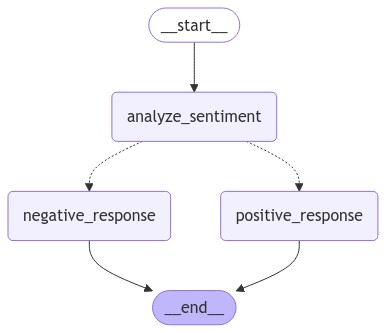

{'message': 'We’re sorry to hear that. How can we improve? 😞'}


In [1]:
from typing_extensions import TypedDict
from typing import Literal
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

class State(TypedDict):
    message: str
    sentimant: str

def analyze_sentiment(state):
    print("---Analyzing Sentiment---")
    text = state["message"].lower()
    
    # Simple sentiment analysis
    if any(word.lower() in text for word in ["good", "great", "happy"]):
        return {"sentiment": "positive"}
    if any(word.lower() in text for word in ["bad", "sad", "terrible"]):
        return {"sentiment": "negative"}
    return {"sentiment": "neutral"}

def positive_response(state):
    print("---Positive Response---")
    return {"message": "Thank you for the positive feedback! 😊"}

def negative_response(state):
    print("---Negative Response---")
    return {"message": "We’re sorry to hear that. How can we improve? 😞"}


def sentiment_router(state) -> Literal["positive_response", "negative_response"]:
    print("---Router---")
    if state["sentiment"] == "positive":
        return "positive_response"
    return "negative_response"


def build_graph():
    graph = StateGraph(state_schema=State)

    # add node
    graph.add_node("analyze_sentiment", analyze_sentiment)
    graph.add_node("positive_response", positive_response)
    graph.add_node("negative_response", negative_response)


    # add edge
    graph.add_edge(start_key=START, end_key="analyze_sentiment")
    graph.add_conditional_edges("analyze_sentiment", sentiment_router)
    graph.add_edge(start_key="negative_response", end_key=END)
    graph.add_edge(start_key="positive_response", end_key=END)

    # Compile graph
    compile_graph = graph.compile()
    return compile_graph

def main():
    graph = build_graph()
    # Invoke the graph with input
    result = graph.invoke({"message": "Bad today!"})
    display(Image(graph.get_graph().draw_mermaid_png()))
    print(result)

if __name__ == "__main__":
    main()